This notebook provides code to recreate the main figures from Pettine, W. W., Louie, K., Murray, J. D, Wang, X. J., "Hierarchical Network Model Excitatory-Inhibitory Tone Shapes Alternative Strategies for Different Degrees of Uncertainty in Multi-Attribute Decisions." PLoS Computational Biology, 2021

For questions, email warren.pettine@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fixedPointAnalysis import *
from dynamicalModel import *
from plotFunctions import *
import excitInhibImbalanceSim as eis

# Figure 2B

First, run simulations over the subjective values.

In [13]:
ref_val = 20
input_range = np.arange(15,25.5,0.5)
n_trials = 500
sample_rate = 1000
fixed_point_fname='simulation_results/fp_table.pickle'

w=np.array([[0.32, -0.08],[-0.08, 0.32]])
P = hnParameters(input_range=input_range,w=w,n_trials=n_trials,sample_rate=sample_rate,fixed_point_fname=fixed_point_fname)
psych_ref_concave = psychometricWithReference(P=P,ref_vals=ref_val)

w=np.array([[0.33, -0.01],[-0.01, 0.33]])
P = hnParameters(input_range=input_range,w=w,n_trials=n_trials,sample_rate=sample_rate,fixed_point_fname=fixed_point_fname)
psych_ref_linear = psychometricWithReference(P=P,ref_vals=ref_val)

w=np.array([[0.34, -0.00],[-0.00, 0.34]])
P = hnParameters(input_range=input_range,w=w,n_trials=n_trials,sample_rate=sample_rate,fixed_point_fname=fixed_point_fname)
psych_ref_convex = psychometricWithReference(P=P,ref_vals=ref_val)

psych_ref_concave.runSVsweep()
psych_ref_linear.runSVsweep()
psych_ref_convex.runSVsweep()

Running single decision simulation in parallel
Obtaining number of cores using mp.cpu_count
Finished collecting results
Running single decision simulation in parallel
Obtaining number of cores using mp.cpu_count
Finished collecting results
Running single decision simulation in parallel
Obtaining number of cores using mp.cpu_count
Finished collecting results


Then, plot the results.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


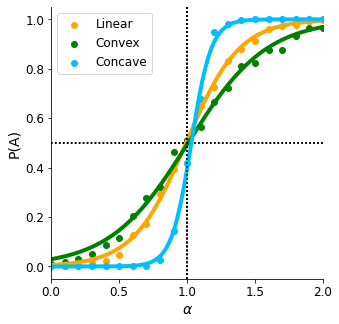

In [14]:
colors = ['orange','g','deepskyblue']
fig_dir = 'output_figures/'
fig_name = 'psychometric_curves'
fmt = 'eps'

input_range = psych_ref_concave.P['input_range']
fig, ax = plt.subplots(figsize=[5,5])

# psych_ref_concave.p_A[np.isnan(psych_ref_concave.p_A)] = .5

plotPsychometricCurve(input_range,psych_ref_linear.ref_vals,psych_ref_linear.p_A,colors[0],'Linear',ax=ax)
plotPsychometricCurve(input_range,psych_ref_convex.ref_vals,psych_ref_convex.p_A,colors[1],'Convex',ax=ax)
plotPsychometricCurve(input_range,psych_ref_concave.ref_vals,psych_ref_concave.p_A,colors[2],'Concave',ax=ax)

plt.legend(fontsize=12)
plt.savefig(f'{fig_dir}{fig_name}.{fmt}')

# Figure 2C

Given the runtime, we'll load pre-simulated files. You can create these with other settings (weights, reference, etc.) using the gridVarBund() class.

In [2]:
#General plot settings
font_size = 12
annotate = False
fmt = 'eps'
dir_name = 'simulation_results/'
fig_dir = 'output_figures/'
fig_name_base = 'simulation_IC_'

#Names of the data files
file_name_concave = 'grid_vary_0_42_2_E_.3_.4_I_0_.1_ID1559399040_E_0.32_I_-0.08'
file_name_linear = 'grid_vary_0_40_2_linear_weights_ID1566925010_E_0.33_I_-0.01'
file_name_convex = 'grid_vary_0_42_2_E_.3_.4_I_0_.1_ID1559399040_E_0.34_I_-0.0'

#Load the data into the class that created it
grid_concave = gridVarBund()
grid_concave.loadGridData(file_name=(dir_name + file_name_concave + '.pickle'))

grid_linear = gridVarBund()
grid_linear.loadGridData(file_name=(dir_name + file_name_linear + '.pickle'))

grid_convex = gridVarBund()
grid_convex.loadGridData(file_name=(dir_name + file_name_convex + '.pickle'))

#Plot the guys
plot_grid = plotGrid(grid_concave)
plot_grid.saveHeatmap(vals='p_A',fig_name=f'{fig_dir}{fig_name_base}concave.{fmt}',annotate=annotate,
                      fontsize=font_size,fmt=fmt)

plot_grid = plotGrid(grid_linear)
plot_grid.saveHeatmap(vals='p_A',fig_name=f'{fig_dir}{fig_name_base}linear.{fmt}',annotate=annotate,
                      fontsize=font_size,fmt=fmt)

plot_grid = plotGrid(grid_convex)
plot_grid.saveHeatmap(vals='p_A',fig_name=f'{fig_dir}{fig_name_base}convex.{fmt}',annotate=annotate,
                      fontsize=font_size,fmt=fmt)

No parameters given.
No parameters given.
No parameters given.


# Figure 2D

For this one, you get both the raw curvatures, and the contour that was used to make Figure 2D in the paper. For the contour, colors seen in Figure 2D were added using indesign.

In [3]:
#Weight Convexity heatmaps
fmt = 'eps'
dir_name = 'simulation_results/'
fig_dir = 'output_figures/'
fig_name_base = 'vary_EI_Convexity_'
f_name = 'grid_vary_0_40_2_E_.3_.4_I_.0_.1_0.005_ellipseFit.pickle'

grid = gridVarBund()
grid.loadGridData(file_name=(dir_name + f_name))
grid.poly_fit -= 1
plot_varyEI = plotVaryIE(grid)   
plot_varyEI.saveHeatmap(vals='convexity',fig_name=f'{fig_dir}{fig_name_base}heatmap.{fmt}',annotate=False)

grid.poly_fit += 1
plot_varyEI = plotVaryIE(grid)
levels = [.8,1.2]
plot_varyEI.saveContour(vals='convexity',fig_name=f'{fig_dir}{fig_name_base}contour.{fmt}',levels=levels)

No parameters given.
vary_noise_sigma not found
vary_noise_sigma not found


# Figure 3

Both Fig 3A and B use the same data, and it's kinda big, so we'll just load it once.

In [4]:
dir_name = 'simulation_results/'
f_name = 'fp_table_full.pickle'
params, fixed_points, stability, n_steps, traj_fp = loadFixedPointData(f_name=dir_name+f_name)

# Manipulate whether inputs are linear (exponent=1), or nonlinear (exponent!=1)
params[:,:2], _ = convertInputSV(params[:,:2],exponent=1) 

### Figure 3A

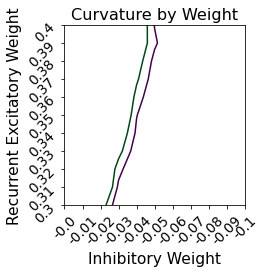

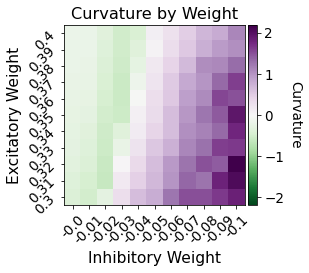

In [5]:
fig_dir = 'output_figures/'
fig_name_base = 'fixed_point_curvature'

plotFixedPointIndiffCurvatureContour(params, traj_fp, fmt='eps', nonlinear_sv=False, sv_exp=2, levels=[-.1,.1],
                           fig_name_base=fig_name_base, save_dir=fig_dir)

plotFixedPointIndiffCurvatureHeatmap(params, traj_fp, fmt='eps', nonlinear_sv=False, save_dir=fig_dir,
                                     fig_name_base=fig_name_base,cmap='PRGn_r')

### Figure 3B

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


plotting Linear FP IO


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


done
plotting Convex FP IO
done
plotting Concave FP IO


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


done


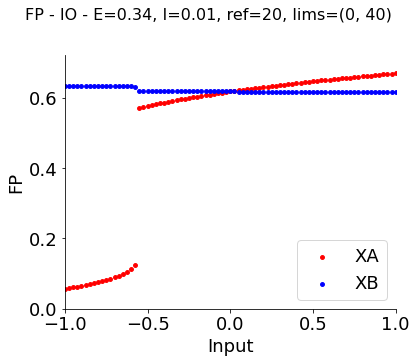

In [6]:
lims=np.array([0,40])

file_dir = 'output_figures/'

print('plotting Linear FP IO')
plotFpIO(params, traj_fp, output='FP', E=0.33, I=0.02, lims=lims, fmt='eps',f_dir=file_dir)

print('plotting Convex FP IO')
plotFpIO(params, traj_fp, output='FP', E=0.34, I=0.01, lims=lims, fmt='eps',f_dir=file_dir)

print('plotting Concave FP IO')
plotFpIO(params, traj_fp, output='FP', E=0.32, I=0.08, lims=lims, fmt='eps',f_dir=file_dir)

# Figure 4

The code below prepares data for both Figure 4 and Figure 5

In [2]:
save_dir = 'simulation_results/'

val_min = 10
#Linear area reward rate
f_name = 'ln_reward_rate_bund-meth_full_0_2_20_hard_False_signal-noise_0.00-v-2.00_intrnl-noise_0.003_long-dur_True_truncate-trial_True.pickle'
ln_reward_rate = rewardRate()
ln_reward_rate.loadRewardRate(file_name=(save_dir + f_name))
## Filter by bundles
I = np.sum(ln_reward_rate.bundles >= val_min,axis=1) > 3
ln_reward_rate.bundles = ln_reward_rate.bundles[I,:]
ln_reward_rate.p_A = ln_reward_rate.p_A[I,:]

#Hierarchical decision
f_name = 'hn_reward_rate_bund-meth_full_10_2_20_hard_False_signal-noise_0-v-2_intrnl-noise_0.003_long-dur_True'
hn_reward_rate = rewardRate()
hn_reward_rate.loadRewardRate(file_name=(save_dir + f_name))
## Filter by bundles
I = np.sum(hn_reward_rate.bundles >= val_min,axis=1) > 3
hn_reward_rate.bundles = hn_reward_rate.bundles[I,:]
hn_reward_rate.p_A = hn_reward_rate.p_A[I,:,:]

rel_perf = plotHNrelLN(hn_reward_rate,ln_reward_rate)

No parameters given
No parameters given


### Figure 4A/B

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


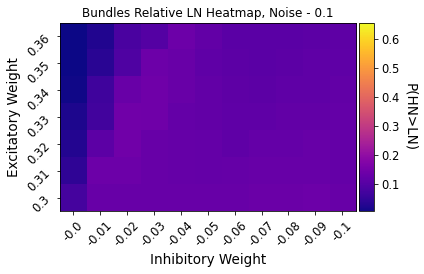

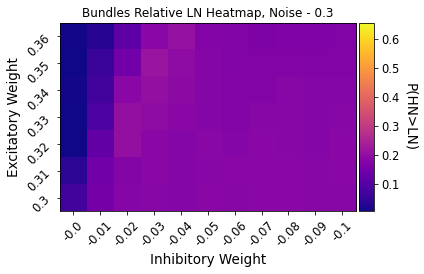

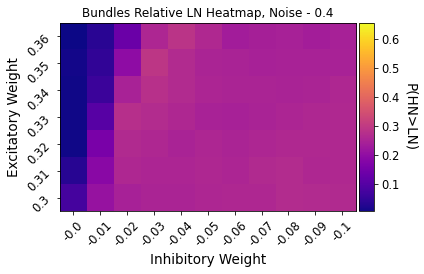

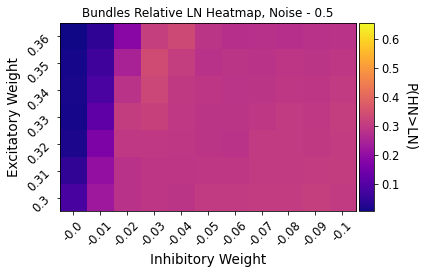

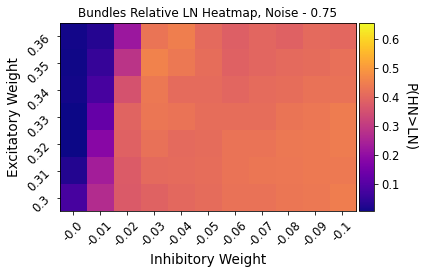

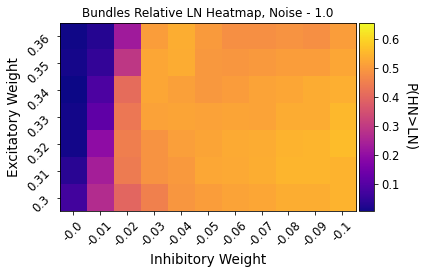

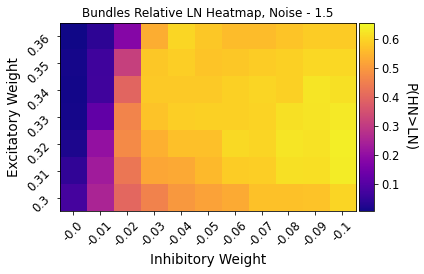

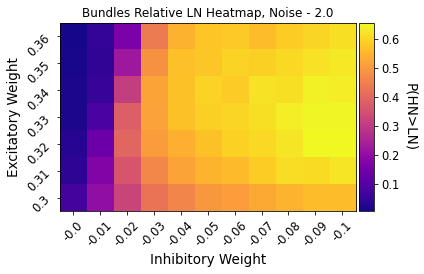

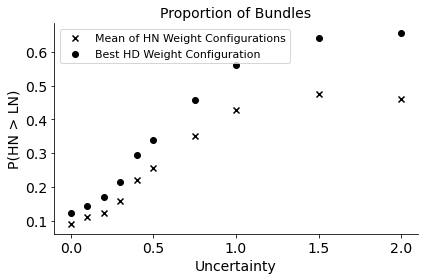

In [3]:
fig_dir = 'output_figures/'
fig_name_base = 'HN Rel LN'
fmt = 'eps'
fontsize=8

rel_perf.saveHeatmap(fig_name_base=(fig_dir+fig_name_base),annotate=False,format=fmt,fontsize=fontsize)
rel_perf.saveScatter(fig_name_base=(fig_dir+fig_name_base),format=fmt)

### Figure 4C/D

No parameters given
No parameters given.


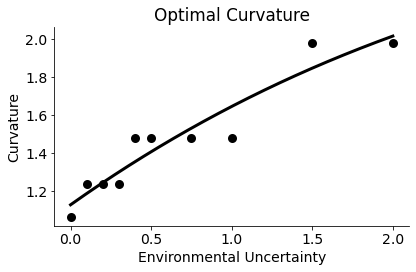

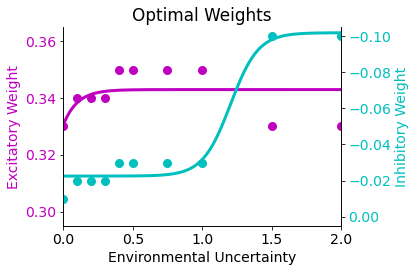

In [4]:
val_min = 10
fig_name_base='p_correct_by_noise_quad'
f_dir = 'simulation_results/'
save_dir='output_figures/'
save_bool=False
fmt='eps'
vals = 'p_correct' # 'p_correct' 'reward_observed'

reward_rate_f_name = 'hn_reward_rate_bund-meth_full_10_2_20_hard_False_signal-noise_0.00-v-2.00_intrnl-noise_0.003_long-dur_True_truncate-trial_True.pickle'
grid_f_name='grid_vary_0_40_2_E_.3_.4_I_0_.1_ellipseFit.pickle'

plotOptimalWeightsConvexByNoise(f_dir=f_dir,save_dir=save_dir,fmt=fmt,
         reward_rate_f_name=reward_rate_f_name,fig_name_base=fig_name_base,
         grid_f_name=grid_f_name,vals=vals,val_min=val_min,save_bool=save_bool)

# Figure 5D

<AxesSubplot:title={'center':'Offers HN>LN'}, xlabel='$\\sigma_{\\eta_I}^2$', ylabel="d'">

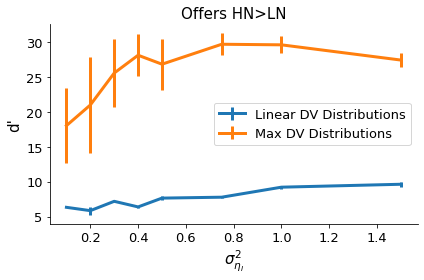

In [3]:
weights=np.array([0.33, -0.1])
fontsize=13
linewidth=3
fig_name='Max-Example_better_offers'
fmt='eps'
save_bool=False

plotHNvsLNOfferDistributionSeparability(rel_perf,ax=None,weights=weights,fontsize=fontsize,linewidth=linewidth,
                                            fig_name=fig_name,fmt=fmt,save_bool=save_bool)

# Figure 6

### Figure 6A/B

No parameters given
No parameters given.


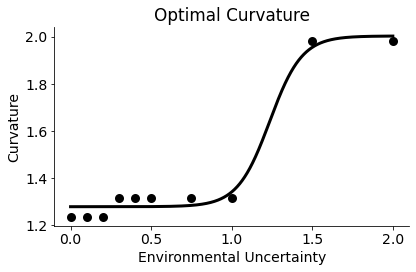

In [4]:
val_min = 10
fig_name_base='p_correct_by_noise_quad'
f_dir = 'simulation_results/'
save_dir='output_figures/'
save_bool=False
fmt='eps'
vals = 'p_correct' # 'p_correct' 'reward_observed'

reward_rate_f_name = 'hn_reward_rate_bund-meth_quad_10_0.5_19_signal-noise_0.00-v-2.00_intrnl-noise_0.003_long-dur_True_truncate-trial_True'
grid_f_name='grid_vary_0_40_2_E_.3_.4_I_0_.1_ellipseFit.pickle'

plotOptimalWeightsConvexByNoise(f_dir=f_dir,save_dir=save_dir,fmt=fmt,
         reward_rate_f_name=reward_rate_f_name,fig_name_base=fig_name_base,
         grid_f_name=grid_f_name,vals=vals,val_min=val_min,save_bool=save_bool)

### Figure 6F

No parameters dictionary given. One is being created using defaults.


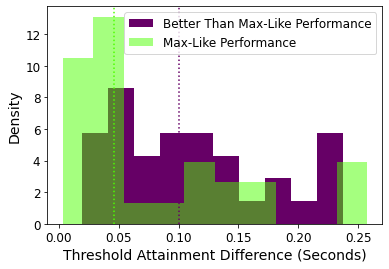

In [6]:
fig_dir = 'output_figures/'
file_dir = 'simulation_results/'
fig_name='threshold_attainment_diff'
thresh=0.7
fontsize=12
fmt = 'eps'
save_bool=False

max_dev_f_name = 'hn_E_0.32_I_0.08_bund-meth_max-like_10_2_20_intrnl-noise_0.003_long-dur_True_truncate-trial.pickle'

max_deviations = maxLikeDeviations()
max_deviations.loadMaxDeviations(file_name=(file_dir + max_dev_f_name))

maxLikeDeviationsThreshCrossDifference(max_deviations,fig_name=f'{fig_dir}{fig_name}',
                                       thresh=thresh,fontsize=fontsize,fmt=fmt,save_bool=save_bool)
plt.show()

# Figure 7

The parameters and data for several Fig 7 plots are the same, so we'll configure those and then move to the plots.

In [7]:
fontsize = 7
fmt = 'eps'
save_dir = 'simulation_results/'
annotate=False

fig_name_base = 'intermediate_area_readout '
fig_dir = 'output_figures/'
f_name = 'hn_reward_rate_bund-meth_full_10_2_20_hard_False_signal-noise_0.00-v-2.00_intrnl-noise_0.003_long-dur_True_truncate-trial_True.pickle'

reward_rate = rewardRate()
reward_rate.loadRewardRate(file_name=(save_dir + f_name))
plot_reward_rate = plotRewardRate(reward_rate)

No parameters given


### Figure 7B

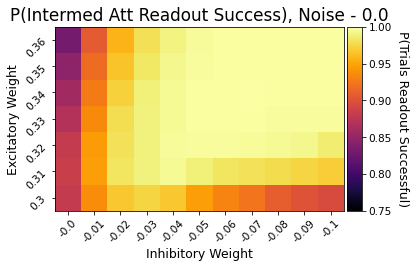

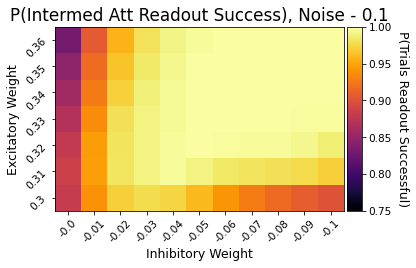

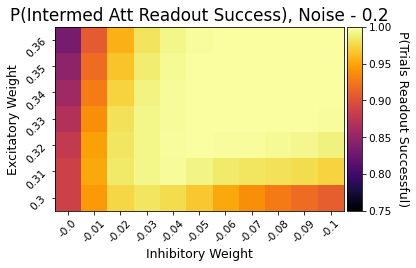

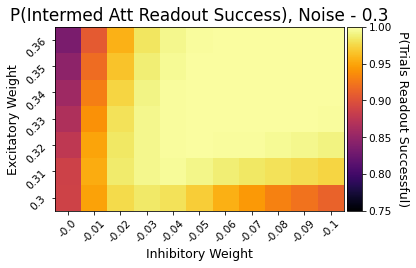

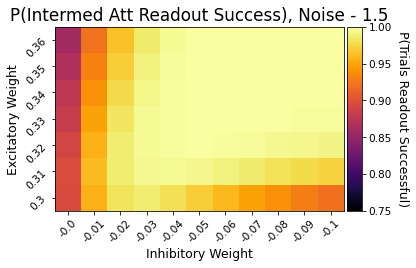

In [8]:
vmin, vmax = 0.75, 1
plot_reward_rate.saveHeatmap(vals='p_intermed_att_decision',format=fmt,fig_name_base=(fig_dir + fig_name_base),fontsize=fontsize,annotate=annotate,vmin=vmin,vmax=vmax,cmap='inferno')

### Figure 7C

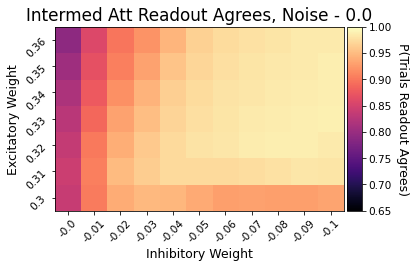

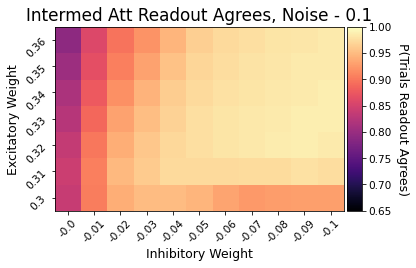

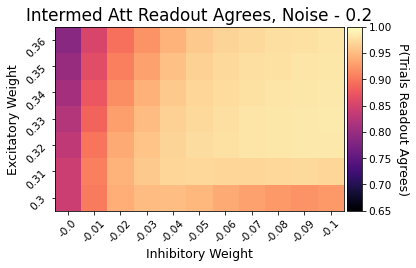

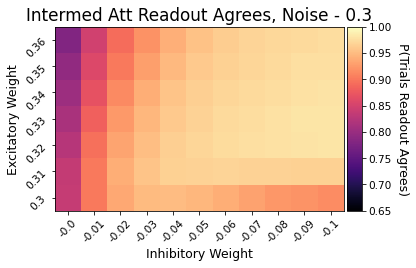

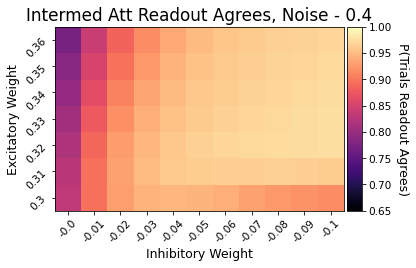

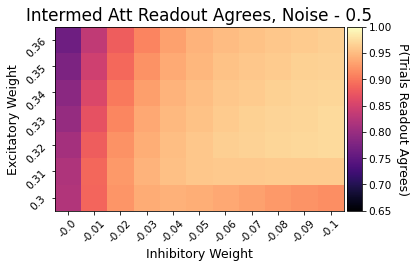

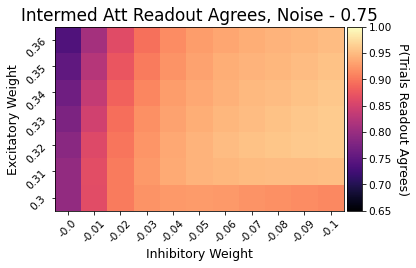

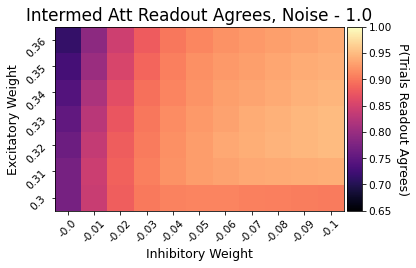

In [9]:
vmin, vmax = 0.65, 1
plot_reward_rate.saveHeatmap(vals='intermed_att_agree',format=fmt,fig_name_base=(fig_dir + fig_name_base),fontsize=fontsize,annotate=annotate,cmap='magma',vmin=vmin,vmax=vmax)

### Figure 7D

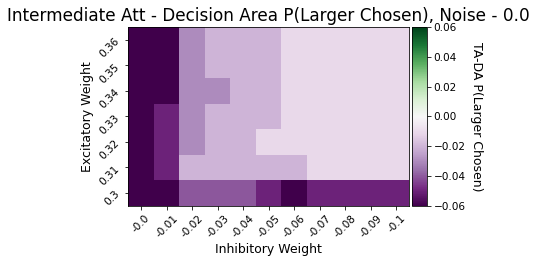

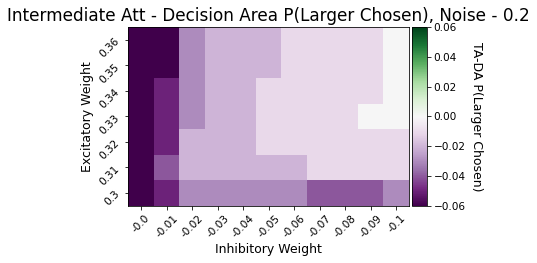

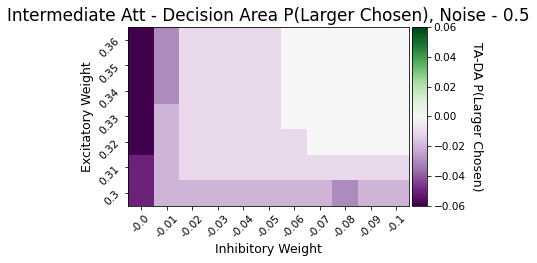

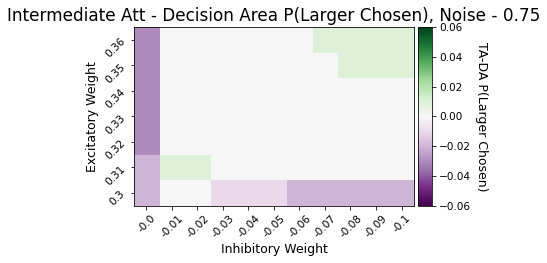

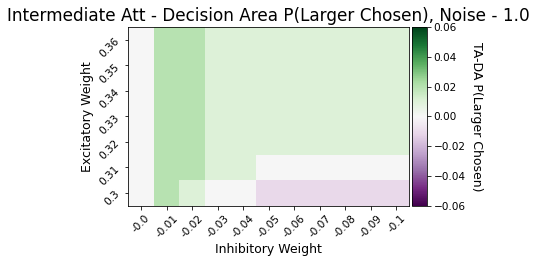

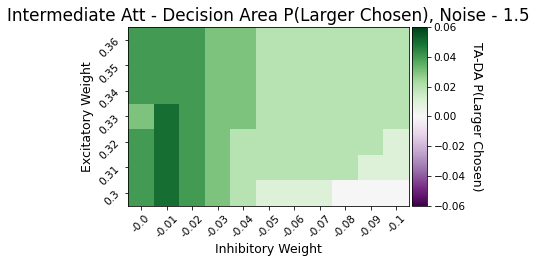

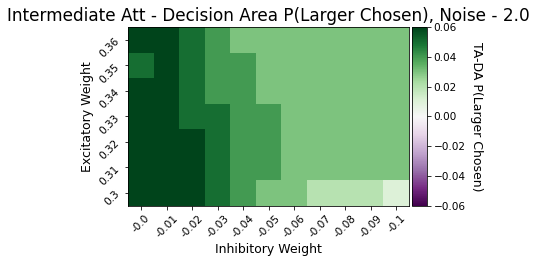

In [10]:
vmin, vmax = -0.06, 0.06
plot_reward_rate.saveHeatmap(vals='intermed_att_v_decision_area_p_correct',format=fmt,fig_name_base=(fig_dir + fig_name_base),fontsize=fontsize,annotate=annotate,vmin=vmin,vmax=vmax,cmap='PRGn')

### Figure 7E

In [11]:
perc_greater = reward_rate.intermed_att_p_correct - reward_rate.p_correct

fig_name_base = 'output_figures/'
format = 'eps'
ttl = 'intermed_rel_final_readout'
fontsize=14
mn = np.mean(perc_greater, axis=0)
mx = np.max(perc_greater, axis=0)
x = reward_rate.P['noise_sigma_range']
fix, ax = plt.subplots()
ax.scatter(x, mn, color='k', marker='x', label='Mean of Weight Configurations')
ax.scatter(x, mx, color='k', label='Best Weight Configuration')
ax.set_xlabel('Uncertainty', fontsize=fontsize)
ax.set_ylabel('P(Intermediate > Final)', fontsize=fontsize)
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.legend(fontsize=fontsize - 3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_title('Proportion of Bundles', fontsize=fontsize)
plt.tight_layout()

plt.savefig(fig_name_base + ttl + '.' + format, format=format, dpi=300)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


# Figure 8

The following creates the plots used in Figure 8 A-D

No parameters given
No parameters given
No parameters given.
Parent Initialized
Obtaining Indices
No parameters given.
No parameters given.


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


*******none
Healthy
[ 0.33 -0.01]
Local Restricted
[ 0.33 -0.01]
FB Restricted
[ 0.3 -0. ]
Local FB Restricted
[ 0.3 -0. ]
*******high
Healthy
[ 0.32 -0.1 ]
Local Restricted
[ 0.32 -0.01]
FB Restricted
[ 0.3 -0. ]
Local FB Restricted
[ 0.3 -0. ]
*******medium
Healthy
[ 0.35 -0.03]
Local Restricted
[ 0.32 -0.01]
FB Restricted
[ 0.3 -0. ]
Local FB Restricted
[ 0.3 -0. ]
*******high
*******none
*******high
*******medium
*******high
Done Simulating!


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


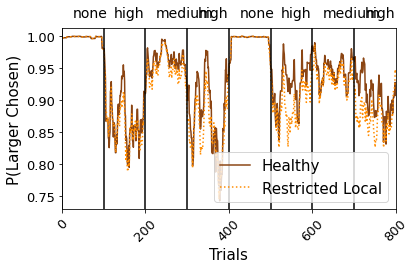

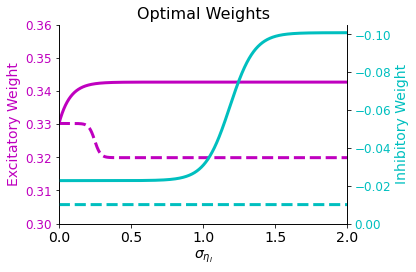

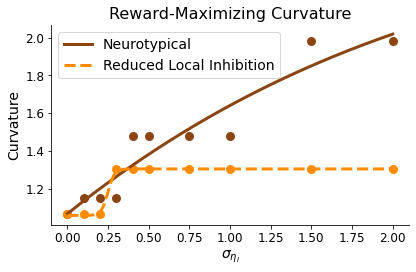

In [12]:
file_dir = 'simulation_results/'
fig_dir = 'output_figures/'
fig_name = 'ei_imbalance_block_simulations'
fmt = 'eps'
fontsize=15
models = ['healthy','local']
restrict_bund_df_thresh=10
restrict_bund_mn_thresh=10
I_thresh = -0.01
target_E = None
use_fit = False
# d_inds = [0,1,9]
diff_inds=[0,5,7]
bounds=([-50, -50, -10, -10], [50, 50, 10, 10])
fit_vals = 'p_correct'

# Datafile names
grid_f_name = 'grid_vary_0_40_2_E_.3_.4_I_.0_.1_0.005_ellipseFit.pickle'
reward_f_name = 'hn_reward_rate_bund-meth_full_10_2_20_hard_False_signal-noise_0.00-v-2.00_intrnl-noise_0.003_long-dur_True_truncate-trial_True.pickle'

# Load the data
reward_rate = rewardRate()
reward_rate.loadRewardRate(file_name=(file_dir + reward_f_name))
    
# Create and run the simulation
ie_sim = eis.eiSim(grid_f_name=grid_f_name,fb_convex=False,f_dir=file_dir,reward_f_name=reward_f_name,
                     n_trials_total=800,restrict_bund_df_thresh=restrict_bund_df_thresh,
                     I_thresh=I_thresh,restrict_bund_mn_thresh=restrict_bund_mn_thresh,
                    diff_inds=diff_inds,target_E=target_E,bounds=bounds,use_fit=use_fit,fit_vals=fit_vals)

ie_sim.simulateSession()
ie_sim.plotSessionReward(fig_name=(fig_dir + fig_name),models=models,
                    fmt=fmt,fontsize=fontsize,vals='reward_norm')
ie_sim.simulateAll(paradigm='sessions')

# Plot results from the simulation
ylim = [np.min(ie_sim.reward_norm), np.max(ie_sim.reward_norm)]
y_lim_inhib=[-.1, 0]

ie_sim.plotOverallReward(fig_name=fig_name,typ='line',ylim=ylim,
                    models=models,fmt=fmt,fontsize=fontsize,vals='reward_norm')

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ie_sim.plotOptimalEI(ax1=ax1,ax2=ax2,linestyle='-',lbl='Neurotypical',inhib_thresh=-0.1,y_lim_inhib=y_lim_inhib,fmt=fmt,save_dir=fig_dir)
ie_sim.plotOptimalEI(ax1=ax1,ax2=ax2,linestyle='--',lbl='Reduced Local Inhibition',inhib_thresh=-0.01,y_lim_inhib=y_lim_inhib,fmt=fmt,save_dir=fig_dir)

fig, ax = plt.subplots()
ie_sim.plotOptimalCurvature(ax=ax,color='saddlebrown',lbl='Neurotypical',inhib_thresh=-0.1,linestyle='-',fmt=fmt,save_dir=fig_dir)
ie_sim.plotOptimalCurvature(ax=ax,color='darkorange',lbl='Reduced Local Inhibition',inhib_thresh=-0.01,linestyle='--',fmt=fmt,save_dir=fig_dir)